Titanic survived Project

Project Description

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster.
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not.

Attribute Information\
Passenger id- Unique Id of the passenger\
Pclass- Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)\
Survived- Survived (0 = No; 1 = Yes)\
Name- Name of the passenger\
Sex- Sex of the passenger (Male, Female)\
Age- Age of the passenger\
Sibsp- Number of Siblings/Spouses Aboard\
Parch- Number of Parents/Children Aboard\
Ticket- Ticket Number\
Fare- Passenger Fare (British pound)\
Cabin- Cabin\
Embarked- Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

Dataset Link-
https://github.com/dsrscientist/dataset1/blob/master/titanic_train.csv

In [561]:
# Essential Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [562]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [563]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [564]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [565]:
df[df.Age<1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S


In [566]:
df.duplicated().sum()

0

### Intial Observations
- Pclass ,sex , survived Embarked cloumns has categorical values therefore we will change their dtype to category
- Age column has float values and as there is only 7 passengers who is aged less than a year . We will change the dtype to int instead.
- Passenger Id, Name and Ticket column are not much use to us we will drop them
- Data has missing values which needs to be handled
  - `Cabin` has 687 missing values out of 891 entries which means 77% of the data is missing. It doesnt make any sense to keep this feature therefore we will drop it.
  - `Age` has 177 missing values out of 891 entries which means 19% of the data is missing. Its not that much so we will impute them.
  - `Embarked` has 2 missing values only
- Data doesnt have any duplicate entries  
- Survived will be our target variable  


### Droping unneccesary columns

In [567]:
df=df.drop(columns=['PassengerId','Name','Cabin','Ticket'],axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [568]:
df[df.duplicated()== True]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
47,1,3,female,NaN,0,0,7.7500,Q
76,0,3,male,NaN,0,0,7.8958,S
77,0,3,male,NaN,0,0,8.0500,S
87,0,3,male,NaN,0,0,8.0500,S
95,0,3,male,NaN,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S
877,0,3,male,19.0,0,0,7.8958,S
878,0,3,male,NaN,0,0,7.8958,S
884,0,3,male,25.0,0,0,7.0500,S


In [569]:
# Removing the duplicate entries
df.drop_duplicates(inplace=True)
df.shape

(780, 8)

### Lets handle the Missing values

In [570]:
# Imputing Mean in place of Nan values for Age column
df['Age'].fillna(df['Age'].mean(),inplace=True)

# Imputing the Most recurring town 'S' in the Embarked column in place of nan values
print(df['Embarked'].value_counts().idxmax())
df['Embarked'].fillna(df['Embarked'].value_counts().idxmax(),inplace=True)


S


### Changing the dtypes of features

In [571]:
# to Category
columns = ['Pclass','Sex','Embarked','Survived']
for col in columns:
  df[col]=df[col].astype('category')


In [572]:
# To integer
#df['Age']=df['Age'].astype('int64')

In [573]:
df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 780 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  780 non-null    category
 1   Pclass    780 non-null    category
 2   Sex       780 non-null    category
 3   Age       780 non-null    float64 
 4   SibSp     780 non-null    int64   
 5   Parch     780 non-null    int64   
 6   Fare      780 non-null    float64 
 7   Embarked  780 non-null    category
dtypes: category(4), float64(2), int64(2)
memory usage: 34.0 KB


# Univariate Analysis

### Survived Column

In [574]:
df['Survived'].value_counts()


0    458
1    322
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

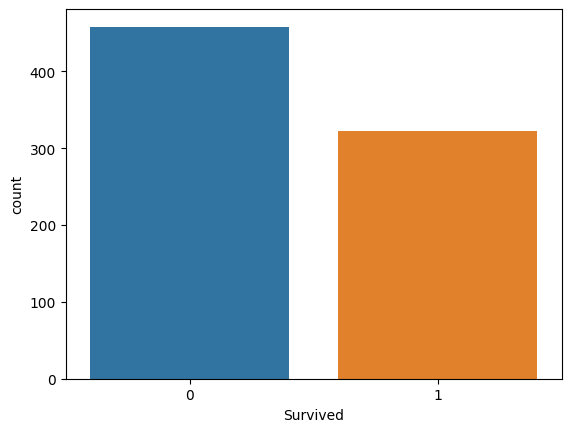

In [575]:
sns.countplot(df,x='Survived')

- Almost 70% people died

### Sex Column

In [576]:
df['Sex'].value_counts()

male      488
female    292
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

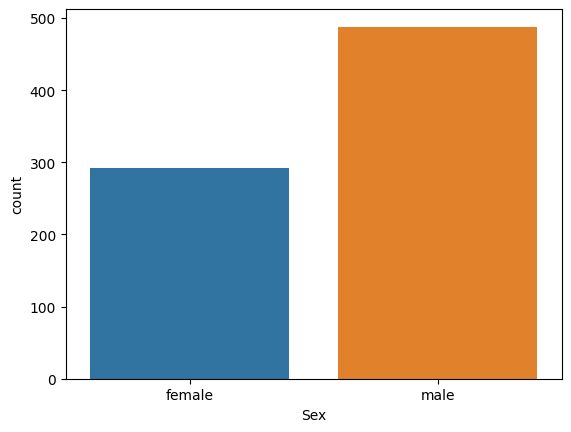

In [577]:
sns.countplot(df,x='Sex')

In [578]:
(df['Sex'].value_counts()/780)*100

male      62.564103
female    37.435897
Name: Sex, dtype: float64

- There were 63% of male passengers as opposed to 37% of female ones.

### Pclass Column

In [579]:
(df['Pclass'].value_counts()/780)*100

3    51.794872
1    27.179487
2    21.025641
Name: Pclass, dtype: float64

In [580]:
df.groupby(by='Pclass')['Fare'].max()

Pclass
1    512.3292
2     73.5000
3     69.5500
Name: Fare, dtype: float64

In [581]:
df.groupby(by='Pclass')['Fare'].min()

Pclass
1    0.0
2    0.0
3    0.0
Name: Fare, dtype: float64

<Axes: xlabel='Pclass', ylabel='count'>

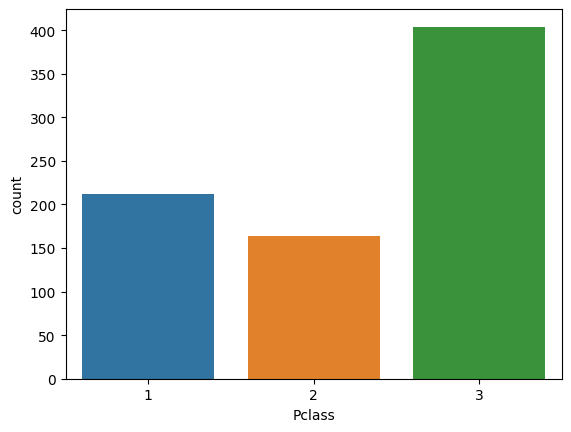

In [582]:
sns.countplot(df,x='Pclass')

- Most of the people were travelling Pclass 3
- Least were travelling in Pclass 2
- Its possible that fare difference between Pclass 1 and 2 is not relatively large as compared to difference of fare in 2 and 3

### Age Column

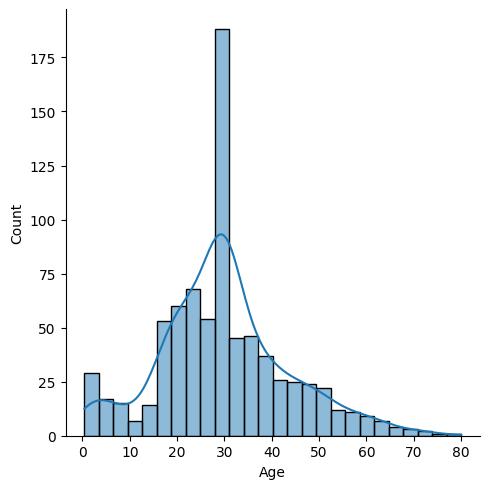

In [583]:
sns.displot(df,x='Age',kde=True)

In [584]:
df['Age'].skew()

0.3940807034232534

- Distribution is fairly Symmertical

In [585]:
df['Age'].kurt()

0.5758041600479933

- Has very less peakedness

Upper Bound: 57.0
Lower Bound: 0.42


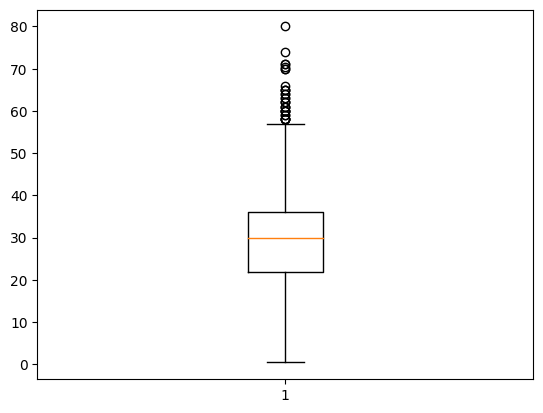

In [586]:
age_box = plt.boxplot(df['Age'])

# Getting Upper and lower Bounds
upper_whisker = age_box["whiskers"][1].get_ydata()[1]
lower_whisker = age_box["whiskers"][0].get_ydata()[1]

print("Upper Bound:",upper_whisker)
print("Lower Bound:",lower_whisker)
plt.show()

Note :
- Anything above 57 and less than 1 is being considered as outliers. Let us check their numbers

In [587]:
# People who are older than 60 years of age
df[df['Age']>57].shape[0]

32

In [588]:
# People having age between 60 to 65
df[(df['Age']>60) & (df['Age']<65)].shape[0]

10

In [589]:
# People having age between 65 to 70
df[(df['Age']>65) & (df['Age']<70)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
33,0,2,male,66.0,0,0,10.5,S


In [590]:
# People having age between 70 to 75
df[(df['Age']>70) & (df['Age']<75)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
96,0,1,male,71.0,0,0,34.6542,C
116,0,3,male,70.5,0,0,7.7500,Q
493,0,1,male,71.0,0,0,49.5042,C
851,0,3,male,74.0,0,0,7.7750,S


In [591]:
df[df['Age']>75]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
630,1,1,male,80.0,0,0,30.0,S


In [592]:
df[df['Age']<1]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
78,1,2,male,0.83,0,2,29.0000,S
305,1,1,male,0.92,1,2,151.5500,S
469,1,3,female,0.75,2,1,19.2583,C
755,1,2,male,0.67,1,1,14.5000,S
803,1,3,male,0.42,0,1,8.5167,C
831,1,2,male,0.83,1,1,18.7500,S


Conclusion:
- Age has a normal distribution
- Between Ages ranging from 57 to 75 there `may or may not` be outliers
- There is only one person aged more than 75 and that too 80 years of age definetly an outlier just by looking.

### Embarked Column

In [593]:
print(df['Embarked'].value_counts())
print((df['Embarked'].value_counts()/780)*100)

S    567
C    155
Q     58
Name: Embarked, dtype: int64
S    72.692308
C    19.871795
Q     7.435897
Name: Embarked, dtype: float64


<Axes: xlabel='Embarked', ylabel='count'>

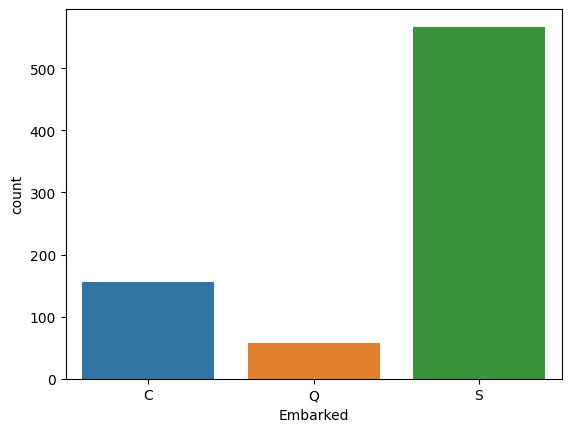

In [594]:
sns.countplot(df,x='Embarked')

- 73% of passangers were from Southampton
- 20% were from Cherbourg
- 7% were from Queenstown


### Sibsp column (Traveling with Siblings or Spouses)

In [595]:
(df['SibSp'].value_counts()/780)*100

0    65.769231
1    25.769231
2     3.461538
4     2.307692
3     1.794872
5     0.641026
8     0.256410
Name: SibSp, dtype: float64

- 66% people were traveling without their Siblings or spuses
- Rest were with their siblings or spouses

### Parch Column (Travelling with parents or children)

In [596]:
(df['Parch'].value_counts()/780)*100

0    73.846154
1    14.615385
2     9.615385
5     0.641026
3     0.641026
4     0.512821
6     0.128205
Name: Parch, dtype: float64

- 74% people were travelling without their parents or their children
- Rest were travelling with their parents or their children

### Fare Column

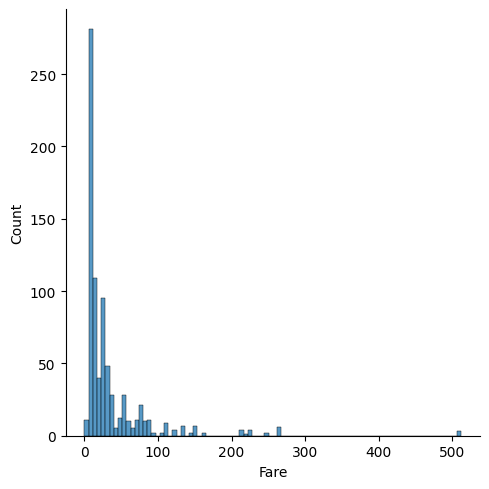

In [597]:
sns.displot(df,x='Fare')

In [598]:
print(df['Fare'].skew())

4.561009669645996


- Highly positively Skewed distribution

In [599]:
print(df['Fare'].kurt())

30.07510083214214


- Very High peakedness
- Most People opted to buy cheaper tickets

Upper Bound: 73.5
Lower Bound: 0.0


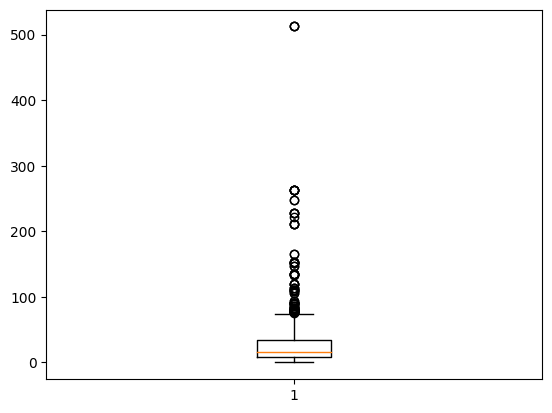

In [600]:
fare_box = plt.boxplot(df['Fare'])

# Getting Upper and lower Bounds
upper_whisker = fare_box["whiskers"][1].get_ydata()[1]
lower_whisker = fare_box["whiskers"][0].get_ydata()[1]

print("Upper Bound:",upper_whisker)
print("Lower Bound:",lower_whisker)
plt.show()

- Lower whisker is at 0
- Upper whisker is at 73.5. Any point lying beyond 73.5 is reflecting as outlier due to skewness.
- We have to check it As we did for Age column  

In [601]:
# No. of people paid in range of 73.5 to 100
df[(df['Fare']>73.5) & (df['Fare']<100)].shape[0]

44

In [602]:
# No. of people paid in range of 100 to 150
df[(df['Fare']>100) & (df['Fare']<150)].shape[0]

24

Again a good number

In [603]:
# No. of people paid in range of 150 to 200
df[(df['Fare']>150) & (df['Fare']<200)].shape[0]

9

Number of people reduced comparatively but its still a good amount of people

In [604]:
# No. of people paid in range of 200 to 250
df[(df['Fare']>200) & (df['Fare']<250)].shape[0]

11

Again good number of people

In [605]:
# No. of people paid in range of 250 to 300
df[(df['Fare']>250) & (df['Fare']<300)].shape[0]

6

May or may not be considered as outlier

In [606]:
# No. of people paid more than 300
df[df['Fare']>300]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
258,1,1,female,35.0,0,0,512.3292,C
679,1,1,male,36.0,0,1,512.3292,C
737,1,1,male,35.0,0,0,512.3292,C


- Only three people have paid more than 300 pounds that to around 512 pounds each. These might be outliers

# Multivariate Analysis

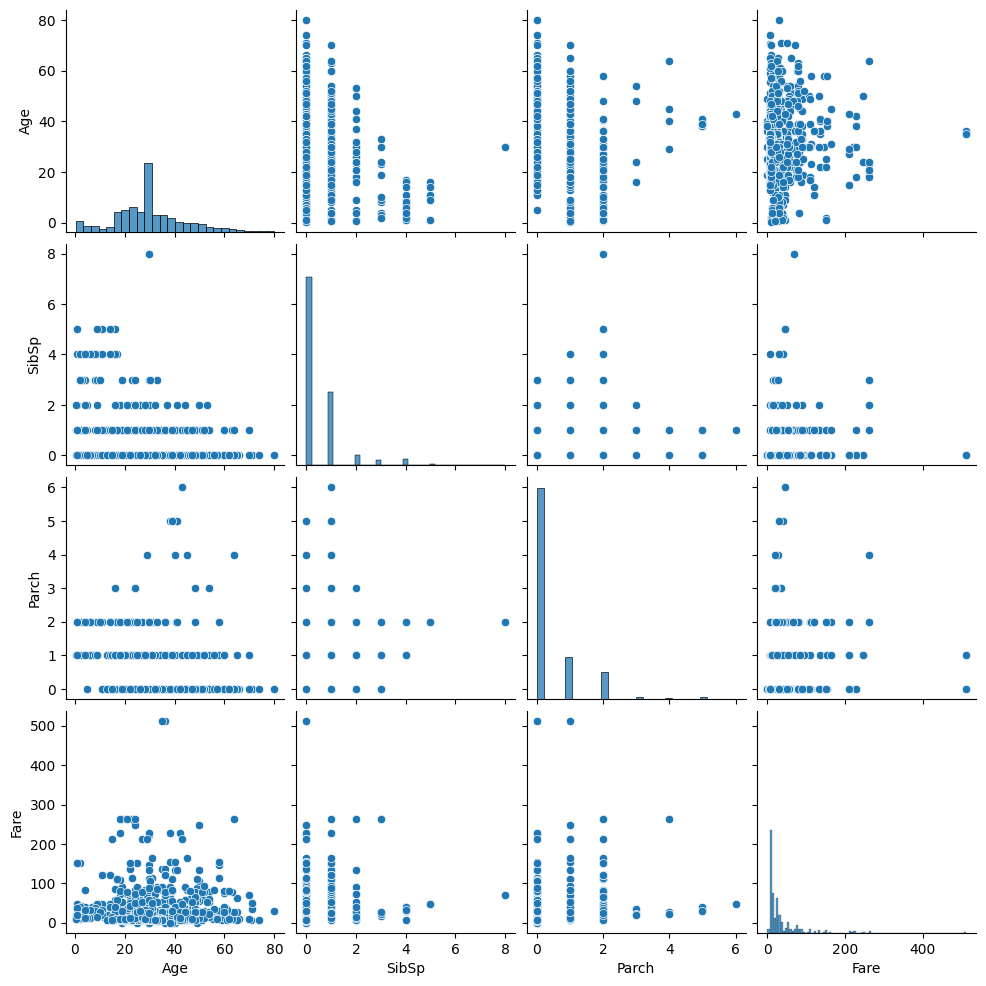

In [607]:
sns.pairplot(df)

<ipython-input-608-8451b8490161>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot =True)


<Axes: >

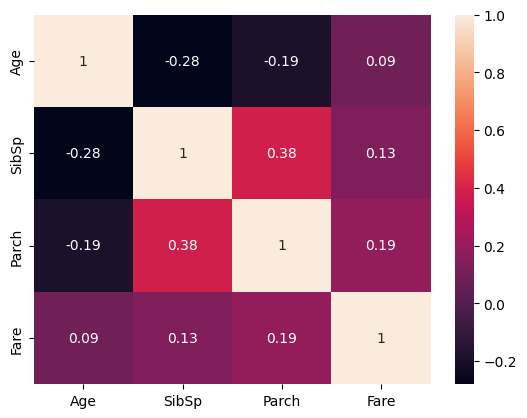

In [608]:
sns.heatmap(df.corr(),annot =True)

In [609]:
# Survival vs PClass
df.groupby(by = 'Pclass')['Survived'].value_counts(normalize=True)*100

Pclass  Survived
1       1           63.679245
        0           36.320755
2       1           50.609756
        0           49.390244
3       0           74.257426
        1           25.742574
Name: Survived, dtype: float64

- More people survived than died in Pclass 1 because of given priorty while evacuation maybe.
- Survival and deceased numbers of people travelling by Pclass 2 is almost similar
- For Some reason large chunk of people died in Pclass 3 might be because :
  - They were not priortized while evacuation
  - Pclass 3 can be situated in lowermost part of the ship which might have been breached by water at the point of collision giving less time people to react  

In [610]:
# Survival  vs Sex
df.groupby(by = ['Sex'])['Survived'].value_counts(normalize=True)*100


Sex     Survived
female  1           73.972603
        0           26.027397
male    0           78.278689
        1           21.721311
Name: Survived, dtype: float64

- Almost 74% Females survived as opposed to 22% males
- Females were given priorty while evacuation

In [611]:
# Survived vs Embarked
df.groupby(by = ['Embarked'])['Survived'].value_counts(normalize=True)*100

Embarked  Survived
C         1           58.064516
          0           41.935484
Q         0           65.517241
          1           34.482759
S         0           62.610229
          1           37.389771
Name: Survived, dtype: float64

- for some reason People boarded from Cherbourg survived most in percentage

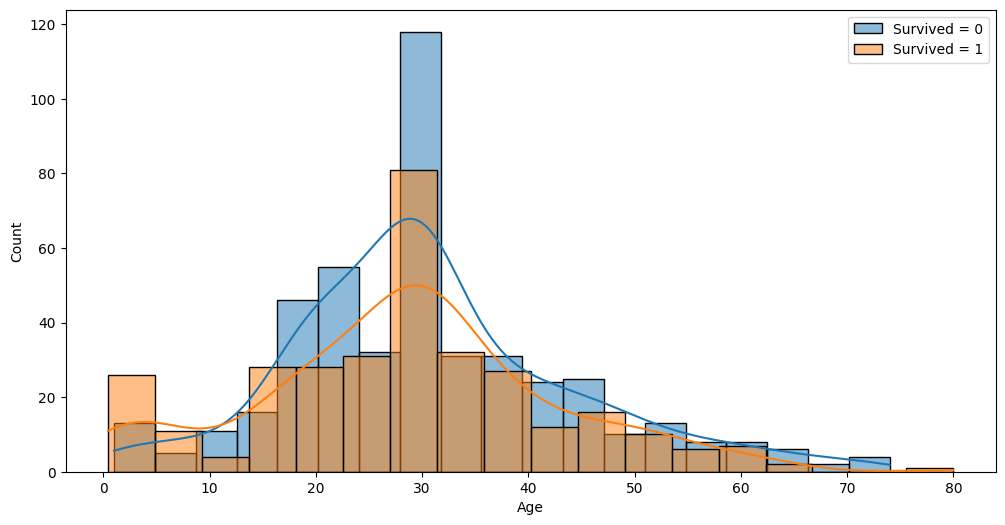

In [612]:
# Age vs Survived
plt.figure(figsize=(12,6))
sns.histplot(df[df['Survived']==0]['Age'],kde = True,label='Survived = 0')
sns.histplot(df[df['Survived']==1]['Age'],kde = True,label='Survived = 1')
plt.legend()
plt.show()

- Probability of survival was high in children aged equal or less than 10
- Mid teenagers to older people had high probabilty of non survival.

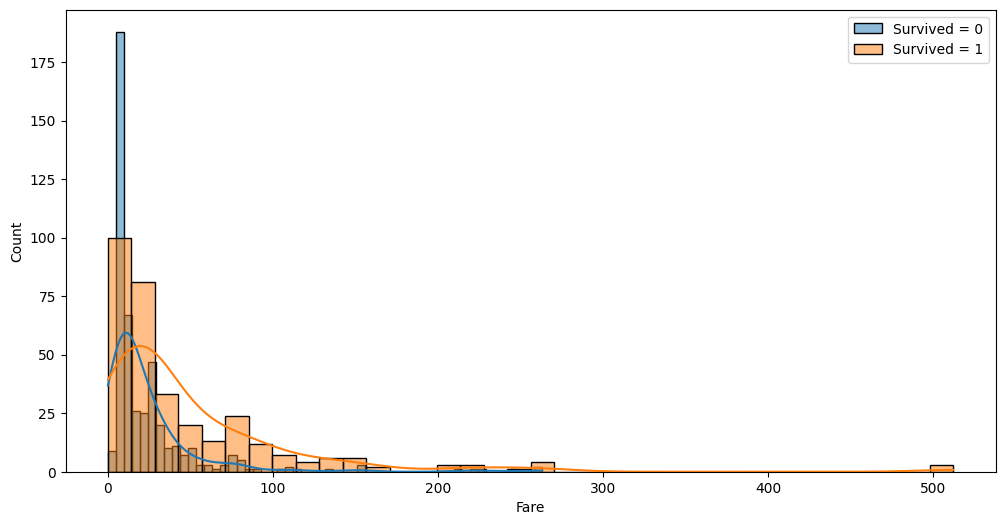

In [613]:
# Survived vs Fare
plt.figure(figsize=(12,6))
sns.histplot(df[df['Survived']==0]['Fare'],kde = True,label='Survived = 0')
sns.histplot(df[df['Survived']==1]['Fare'],kde = True,label='Survived = 1')
plt.legend()
plt.show()

- People who bought tickets at a cheaper price had high count of death rate

## Feature Engineering

In [614]:
df['Age'].sort_values()

803     0.42
755     0.67
469     0.75
831     0.83
78      0.83
       ...  
116    70.50
493    71.00
96     71.00
851    74.00
630    80.00
Name: Age, Length: 780, dtype: float64

In [615]:
#Age column

age_bins = [0, 5, 10, 20, 30, 40, 60,float('inf')]
age_labels = ['Infant', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Middle aged', 'Senior Citizens']

# Replace the age values with categories
df['Age'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

In [616]:
df['Age'].unique()

['Young Adult', 'Adult', 'Middle aged', 'Infant', 'Teenager', 'Child', 'Senior Citizens']
Categories (7, object): ['Infant' < 'Child' < 'Teenager' < 'Young Adult' < 'Adult' < 'Middle aged' <
                         'Senior Citizens']

In [617]:
df.groupby(by='Survived')['Age'].value_counts()

Survived  Age            
0         Young Adult        193
          Adult               85
          Middle aged         82
          Teenager            56
          Senior Citizens     18
          Infant              13
          Child               11
1         Young Adult        113
          Adult               71
          Middle aged         53
          Teenager            41
          Infant              26
          Child               11
          Senior Citizens      7
Name: Age, dtype: int64

In [618]:
# Creating a new feature Family_type combining SibSp and Parch
df['family_size'] = df['SibSp'] + df['Parch']



In [619]:
sorted(df['family_size'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 10]

In [620]:
family_bins = [0, 1, 5, 7, 10]
family_labels = ['No family', 'Small', 'Medium', 'Large']

# Replace the age values with categories
df['family_type'] = pd.cut(df['family_size'], bins=family_bins, labels=family_labels, right=False)

In [621]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_size,family_type
0,0,3,male,Young Adult,1,0,7.2500,S,1,Small
1,1,1,female,Adult,1,0,71.2833,C,1,Small
2,1,3,female,Young Adult,0,0,7.9250,S,0,No family
3,1,1,female,Adult,1,0,53.1000,S,1,Small
4,0,3,male,Adult,0,0,8.0500,S,0,No family
...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,Adult,0,5,29.1250,Q,5,Medium
887,1,1,female,Teenager,0,0,30.0000,S,0,No family
888,0,3,female,Young Adult,1,2,23.4500,S,3,Small
889,1,1,male,Young Adult,0,0,30.0000,C,0,No family


In [622]:
df.drop(columns=['Parch','SibSp','family_size'],inplace=True)

In [623]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,family_type
0,0,3,male,Young Adult,7.2500,S,Small
1,1,1,female,Adult,71.2833,C,Small
2,1,3,female,Young Adult,7.9250,S,No family
3,1,1,female,Adult,53.1000,S,Small
4,0,3,male,Adult,8.0500,S,No family


In [624]:
df.groupby(by ='Survived')['family_type'].value_counts(normalize=True)*100

Survived  family_type
0         No family      64.254386
          Small          28.508772
          Medium          5.921053
          Large           1.315789
1         Small          51.552795
          No family      46.273292
          Medium          2.173913
          Large           0.000000
Name: family_type, dtype: float64

- Among who survived most percentage of people were travelling with small family
- Passangers travelling with large family didnt survive at all
- Among who didnt survive people travelling alone had high mortality rate

## Handling Categorical values

In [625]:
df = pd.get_dummies(df,columns=['Pclass', 'Sex', 'Age','Embarked','family_type'],drop_first=True)

In [627]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 780 entries, 0 to 890
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Survived             780 non-null    category
 1   Fare                 780 non-null    float64 
 2   Pclass_2             780 non-null    uint8   
 3   Pclass_3             780 non-null    uint8   
 4   Sex_male             780 non-null    uint8   
 5   Age_Child            780 non-null    uint8   
 6   Age_Teenager         780 non-null    uint8   
 7   Age_Young Adult      780 non-null    uint8   
 8   Age_Adult            780 non-null    uint8   
 9   Age_Middle aged      780 non-null    uint8   
 10  Age_Senior Citizens  780 non-null    uint8   
 11  Embarked_Q           780 non-null    uint8   
 12  Embarked_S           780 non-null    uint8   
 13  family_type_Small    780 non-null    uint8   
 14  family_type_Medium   780 non-null    uint8   
 15  family_type_Large    78

<Axes: xlabel='Fare', ylabel='Count'>

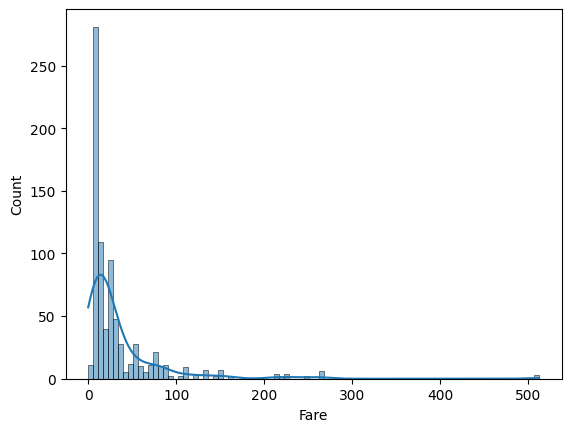

In [628]:
sns.histplot(df['Fare'],kde = True)

In [629]:
# Removing outliers in Fare column

q1 = df['Fare'].quantile(0.25)
q3 = df['Fare'].quantile(0.75)

outliers = df['Fare'][df['Fare'] > q3 + 1.5 * (q3 - q1)]

df = df[~df['Fare'].isin(outliers)]

## Model Training

In [630]:
x = df.drop('Survived',axis=1)
y = df['Survived']

In [631]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# Models
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    SVC(),
    KNeighborsClassifier()
]

results = {}

for classifier in classifiers:
    classifier_name = classifier.__class__.__name__
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[classifier_name] = accuracy

# performance evaluation
for classifier, accuracy in results.items():
    print(f'{classifier}: Accuracy = {accuracy}')

DecisionTreeClassifier: Accuracy = 0.7543859649122807
RandomForestClassifier: Accuracy = 0.7777777777777778
LogisticRegression: Accuracy = 0.8128654970760234
SVC: Accuracy = 0.6608187134502924
KNeighborsClassifier: Accuracy = 0.7602339181286549


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- Logistic Regression works best out of them all